<h2 style="color:blue" align="center">Task-3 Handwritten digit recognition using neural network</h2
    

In [1]:
import tensorflow

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

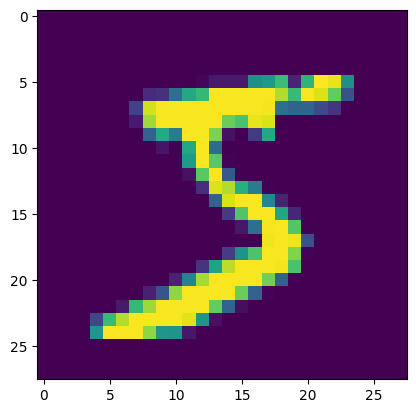

In [4]:
plt.imshow(X_train[0])

In [5]:
y_train.shape

(60000,)

In [6]:
import pandas as pd
pd.Series(y_train).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

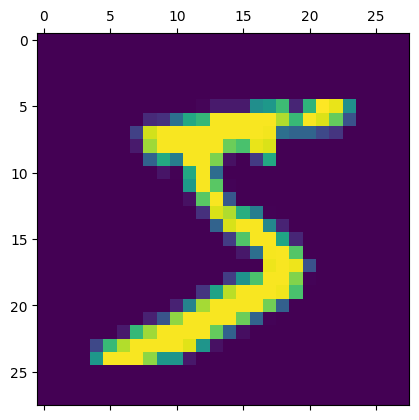

In [8]:
plt.matshow(X_train[0])

In [9]:
y_train[0]

5

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [12]:
X_train_flattened.shape

(60000, 784)

<h3 style='color:purple'>Very simple neural network with no hidden layers</h3>

<img src="https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/1_digits_recognition/digits_nn.jpg?raw=1" />

In [13]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [14]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='softmax')
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
model.fit(X_train_flattened, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 8s 3ms/step - loss: 0.4710 - accuracy: 0.8768
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3037 - accuracy: 0.9151
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2833 - accuracy: 0.9207
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2731 - accuracy: 0.9234
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2669 - accuracy: 0.9261
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2622 - accuracy: 0.9270
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2586 - accuracy: 0.9280
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2554 - accuracy: 0.9295
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2530 - accuracy: 0.9296
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.251

In [18]:
model.layers[0].weights

[<tf.Variable 'dense/kernel:0' shape=(784, 10) dtype=float32, numpy=
 array([[-0.07003203,  0.08459639,  0.0471843 , ..., -0.07668602,
          0.06722202,  0.03588431],
        [-0.06891032,  0.06367617,  0.00187065, ..., -0.00422946,
          0.07264806,  0.0792186 ],
        [ 0.08561175,  0.02354661,  0.07362584, ...,  0.08441121,
          0.08403871, -0.05973599],
        ...,
        [-0.01824557,  0.05923571, -0.01231409, ...,  0.06113782,
          0.03653157, -0.06066864],
        [-0.04500267,  0.02398875, -0.06331275, ..., -0.0662193 ,
          0.01293084, -0.04524605],
        [ 0.002807  ,  0.07732751, -0.03758693, ..., -0.06753666,
          0.0764895 ,  0.05486541]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=
 array([-0.71771914,  0.93617994,  0.19350323, -0.5883755 ,  0.23970324,
         1.8618253 , -0.29220077,  1.0228792 , -1.9553795 , -0.47550347],
       dtype=float32)>]

In [19]:
model.predict(X_test_flattened[0].reshape(1,784))

1/1 [==============================] - 1s 911ms/step


array([[4.0240003e-08, 2.8270955e-14, 1.5524226e-07, 3.0847082e-03,
        1.0891711e-07, 2.1928441e-05, 5.1674743e-14, 9.9664861e-01,
        8.7385251e-06, 2.3565137e-04]], dtype=float32)

In [20]:
np.argmax(model.predict(X_test_flattened[0].reshape(1,784)))

1/1 [==============================] - 0s 24ms/step


7

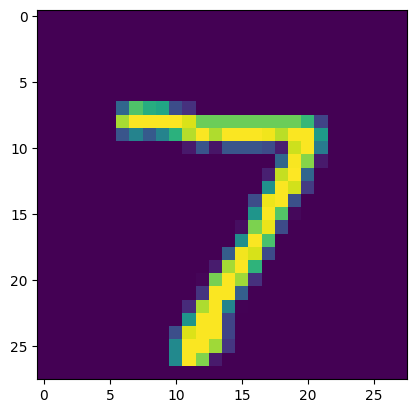

In [21]:
plt.imshow(X_test[0])

In [22]:
y_pred=model.predict(X_test_flattened)
y_pred.shape

313/313 [==============================] - 1s 3ms/step


(10000, 10)

In [23]:
y_pred[0]

array([4.0239847e-08, 2.8270846e-14, 1.5524196e-07, 3.0847022e-03,
       1.0891690e-07, 2.1928379e-05, 5.1674743e-14, 9.9664861e-01,
       8.7385006e-06, 2.3565092e-04], dtype=float32)

In [24]:
np.argmax(y_pred[0])

7

In [25]:
y_test[0]

7

In [26]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2697 - accuracy: 0.9284


[0.2697221636772156, 0.9283999800682068]

In [27]:
y_pred_final=[np.argmax(i) for i in y_pred]
y_pred_final[:5]

[7, 2, 1, 0, 4]

In [28]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.97      0.98      0.98      1135
           2       0.92      0.91      0.92      1032
           3       0.94      0.89      0.91      1010
           4       0.93      0.94      0.93       982
           5       0.90      0.89      0.89       892
           6       0.94      0.95      0.94       958
           7       0.93      0.93      0.93      1028
           8       0.87      0.90      0.88       974
           9       0.91      0.92      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_final)


Text(95.72222222222221, 0.5, 'Truth')

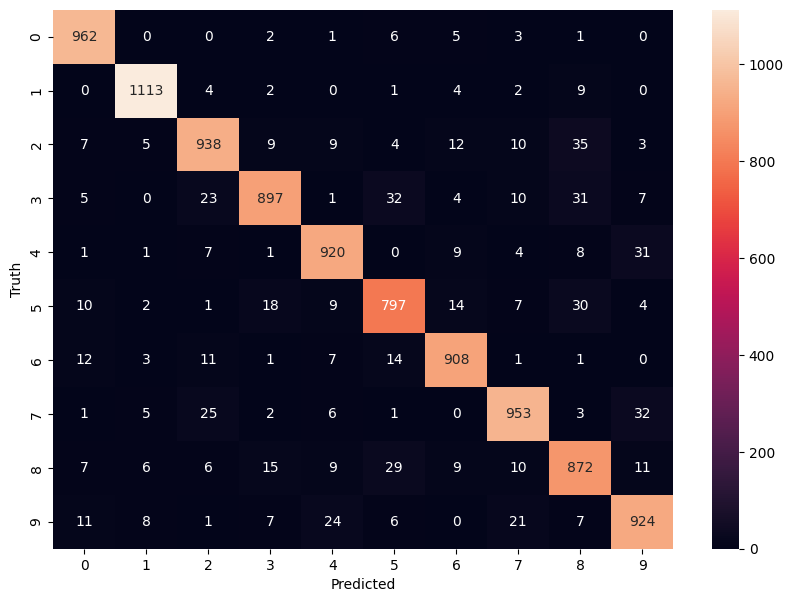

In [38]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using hidden layer</h3>

In [39]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(500,activation="relu"),
    keras.layers.Dense(10, activation='softmax')
])

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               78500     
                                                                 
 dense_2 (Dense)             (None, 500)               50500     
                                                                 
 dense_3 (Dense)             (None, 10)                5010      
                                                                 
Total params: 134,010
Trainable params: 134,010
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
model.fit(X_train_flattened, y_train, epochs=10,validation_data=(X_test_flattened,y_test))

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2254 - accuracy: 0.9328 - val_loss: 0.1301 - val_accuracy: 0.9602
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0989 - accuracy: 0.9699 - val_loss: 0.0952 - val_accuracy: 0.9704
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0705 - accuracy: 0.9777 - val_loss: 0.0851 - val_accuracy: 0.9732
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0543 - accuracy: 0.9826 - val_loss: 0.0801 - val_accuracy: 0.9768
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0426 - accuracy: 0.9858 - val_loss: 0.0883 - val_accuracy: 0.9760
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0340 - accuracy: 0.9883 - val_loss: 0.0916 - val_accuracy: 0.9748
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0284 - accuracy: 0.9901 - val_loss: 0.0906 - val_acc

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               78500     
                                                                 
 dense_2 (Dense)             (None, 500)               50500     
                                                                 
 dense_3 (Dense)             (None, 10)                5010      
                                                                 
Total params: 134,010
Trainable params: 134,010
Non-trainable params: 0
_________________________________________________________________


In [44]:
y_pred=model.predict(X_test_flattened)
y_pred_final=[np.argmax(i) for i in y_pred]

313/313 [==============================] - 1s 2ms/step


In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.94      0.99      0.97      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.96      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [46]:
model.save("final_model.h5")

In [49]:
model1=tf.keras.models.load_model("final_model.h5")

In [50]:
model1.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 4s 10ms/step - loss: 0.0995 - accuracy: 0.9789


[0.09951432794332504, 0.9789000153541565]

313/313 [==============================] - 2s 5ms/step


Text(95.72222222222221, 0.5, 'Truth')

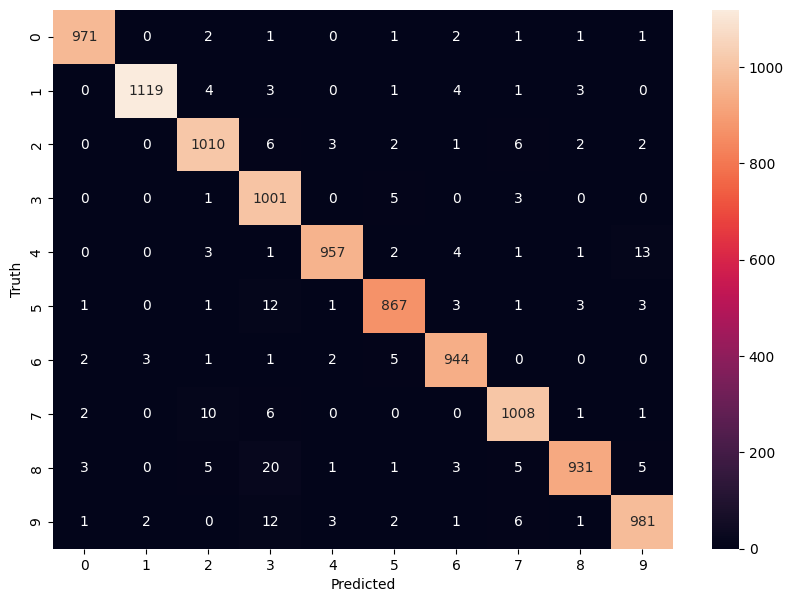

In [51]:
import seaborn as sn
y_predicted = model1.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [52]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2730 - accuracy: 0.9221
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1216 - accuracy: 0.9642
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0862 - accuracy: 0.9740
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0647 - accuracy: 0.9804
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0503 - accuracy: 0.9841
Epoch 6/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0417 - accuracy: 0.9873
Epoch 7/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0335 - accuracy: 0.9899
Epoch 8/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0271 - accuracy: 0.9916
Epoch 9/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0231 - accuracy: 0.9928
Epoch 10/10
1875/1875 [==============================] - 19s 10ms/ste

In [54]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
